# Preliminary Chart Scanning Code
Bob Chesebrough, June 27,2018

Goal is to digitize a couple of images from Toronto Hydro paper
on transformer waveforms.

This is a preliminary step in the ultimate goal of writing an autodecoder to detect anomalous waveforms

Here is the original paper: https://www.elstersolutions.com/assets/downloads/Toronto_Hydro_Transformer_Monitors.pdf

here are the images I want to scan:
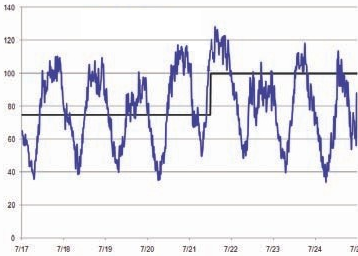







and this

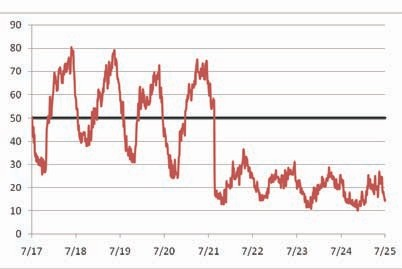


and ultimately what I want to detect is conditions like this (momentaries highest priority, outage is icing on cake):
    
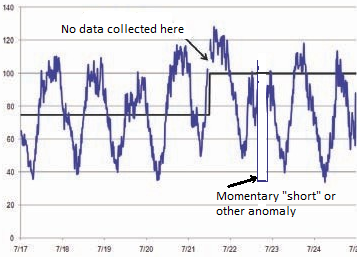

# Utility function to read the png given the DSX credentials

In [1]:
#pip install --upgrade matplotlib
import matplotlib as plt
plt.__version__

'2.2.2'

In [2]:
def get_object_storage_file(container,credentials,filename):  
    """This functions returns a response object containing the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
            'password': credentials['password']}}}}}    
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return resp2

# Utility Functions Used

In [3]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_e8cf95d1871249f5a07b143d737452a3(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_7acbfd2665aad558982f2c5c8bc113c09b760fc9','domain': {'id': 'e9adc56488ce41ffb7469bc094b4e4dd'},
            'password': 'y}&}f)2S68jCj7ac'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)


# @hidden_cell
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_e8cf95d1_8712_49f5_a07b_143d737452a3',
  'project_id':'4c4e226d8e5e4fbe898f378060f59daa',
  'region':'dallas',
  'user_id':'bcc4bcaa5c5a4658a6cc5904fa6b76ef',
  'domain_id':'e9adc56488ce41ffb7469bc094b4e4dd',
  'domain_name':'1417893',
  'username':'member_7acbfd2665aad558982f2c5c8bc113c09b760fc9',
  'password':"""y}&}f)2S68jCj7ac""",
  'container':'DefaultProjectrobertachesebroughibmcom',
  'filename':'TorontoBlue.png'
}
# @hidden_cell
credentials_2 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_e8cf95d1_8712_49f5_a07b_143d737452a3',
  'project_id':'4c4e226d8e5e4fbe898f378060f59daa',
  'region':'dallas',
  'user_id':'bcc4bcaa5c5a4658a6cc5904fa6b76ef',
  'domain_id':'e9adc56488ce41ffb7469bc094b4e4dd',
  'domain_name':'1417893',
  'username':'member_7acbfd2665aad558982f2c5c8bc113c09b760fc9',
  'password':"""y}&}f)2S68jCj7ac""",
  'container':'DefaultProjectrobertachesebroughibmcom',
  'filename':'TorontoRed.png'
}

filereadfromos = 'TorontoBlue.png'
r = get_object_storage_file('DefaultProjectrobertachesebroughibmcom', credentials_1 ,filereadfromos)
with open(filereadfromos, 'wb') as file:  
    file.write(r.content)

filereadfromos = 'TorontoRed.png'
r = get_object_storage_file('DefaultProjectrobertachesebroughibmcom', credentials_1 ,filereadfromos)
with open(filereadfromos, 'wb') as file:  
    file.write(r.content)

# Project to Convert PNG containing a funtion plot to a CSV file

This specifically is being worked to read two utility transformer charts froma PDF 

https://www.elstersolutions.com/assets/downloads/Toronto_Hydro_Transformer_Monitors.pdf

The motive is to gather realistic looking tranformer data in order to synthesize more of it
for proving that a DL algo can detect anamolies in such signals


# Some Utility Functions for Images

In [20]:
from PIL import Image
from __future__ import with_statement

    
def RGBToHTMLColor(rgb_tuple):
    """ convert an (R, G, B) tuple to #RRGGBB """
    hexcolor = '#%02x%02x%02x' % rgb_tuple
    # that's it! '%02x' means zero-padded, 2-digit hex values
    return hexcolor

def HTMLColorToRGB(colorstring):
    """ convert #RRGGBB to an (R, G, B) tuple """
    colorstring = colorstring.strip()
    if colorstring[0] == '#': colorstring = colorstring[1:]
    if len(colorstring) != 6:
        raise Exception(ValueError, "input #%s is not in #RRGGBB format" % colorstring)
    r, g, b = colorstring[:2], colorstring[2:4], colorstring[4:]
    r, g, b = [int(n, 16) for n in (r, g, b)]
    return (r, g, b)

def HTMLColorToPILColor(colorstring):
    """ converts #RRGGBB to PIL-compatible integers"""
    colorstring = colorstring.strip()
    while colorstring[0] == '#': colorstring = colorstring[1:]
    # get bytes in reverse order to deal with PIL quirk
    colorstring = colorstring[-2:] + colorstring[2:4] + colorstring[:2]
    # finally, make it numeric
    color = int(colorstring, 16)
    return color

def PILColorToRGB(pil_color):
    """ convert a PIL-compatible integer into an (r, g, b) tuple """
    hexstr = '%06x' % pil_color
    # reverse byte order
    r, g, b = hexstr[4:], hexstr[2:4], hexstr[:2]
    r, g, b = [int(n, 16) for n in (r, g, b)]
    return (r, g, b)

def PILColorToHTMLColor(pil_integer):
    return RGBToHTMLColor(PILColorToRGB(pil_integer))

def RGBToPILColor(rgb_tuple):
    return HTMLColorToPILColor(RGBToHTMLColor(rgb_tuple))

def getRGBTupleFromImg(file_obj, coords=(0,0)):
    """ 
    Extract an #RRGGBB color string from given pixel coordinates
    in the given file-like object.
    """
    pil_img = Image.open(file_obj)
    pil_img = pil_img.convert('RGB')
    rgb = pil_img.getpixel(coords)
    return rgb

def pop_std(x):
    return x.std(ddof=0)

#!/usr/bin/env python
def ReadPNG(inputFile, outputFile, Rlo, Rhi, Glo, Ghi, Blo, Bhi):
    # read the png file, write it to csv raw, and return filtered dataframe with specified color channels specified
    im = Image.open(inputFile) #relative path to file
    (w,h) = im.size
    #load the pixel info
    pix = im.load()

    #get a tuple of the x and y dimensions of the image
    width, height = im.size

    #open a file to write the pixel data
    with open(outputFile, 'w+') as f:
      f.write('X,Y,R,G,B\n')

      #read the details of each pixel and write them to the file
      for x in range(width):
        for y in range(height):
          r =  pix[x,y][0]
          g =  pix[x,y][1]
          b =  pix[x,y][2]
          f.write('{0},{1},{2},{3},{4}\n'.format(x,h-y,r,g,b))

    df = pd.read_csv(outputFile)
    #blue = df[(df.B>70)&(df.R<80)&(df.G<60)]
    rgb = df[(df.B>Blo) & (df.B<Bhi) & (df.R>Rlo) & (df.R<Rhi) & (df.G>Glo) & (df.G<Ghi)]
    return rgb  

def writeRGBcsv(blue,outputFile):
    meanY = blue.groupby('X')['Y'].mean()
    stdY = blue.groupby('X')['Y'].std()
    blueT = pd.concat([meanY, stdY], axis=1)
    #blueT['meanY'] = meanY
    #blueT['stdY'] = stdY
    blueT['meanYmean'] = meanY.mean()
    blueT['meanYstd'] = meanY.std()
    #blueT.rename(columns = ['meanY', 'stdY', 'meanYmean', 'meanYstd'])
    blueT.columns = ['meanY', 'stdY', 'meanYmean', 'meanYstd']
    blueT.to_csv(outputFile, columns = blueT.columns)
    return blueT

def PlotTrimmed(rgb, color, size):
    from PIL import Image
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt

    x = rgb.X.tolist()
    y = rgb.Y.tolist()

    #plt.scatter(x, y, c=color, s = size)
    #plt.scatter(redT.index, redT.meanY, c='k', s = 1)
    #plt.show()
    
    
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=color, s=size, alpha=0.5)

    ax.grid(True)
    fig.tight_layout()

    plt.show()

    return
        
if __name__ == '__main__':
    htmlcolor = '#ff00cc'
    pilcolor = HTMLColorToPILColor(htmlcolor)
    rgb = HTMLColorToRGB(htmlcolor)
    print pilcolor
    print htmlcolor
    print rgb
    print PILColorToHTMLColor(pilcolor)
    print PILColorToRGB(pilcolor)
    print RGBToPILColor(rgb)
    print RGBToHTMLColor(rgb)
    print
    #img = open('/tmp/bkg.gif', 'r')
    #print getRGBTupleFromImg(img, (0,0))

13369599
#ff00cc
(255, 0, 204)
#ff00cc
(255, 0, 204)
13369599
#ff00cc



# Read the TorontoBlue.png file convert data to Pandas Dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f35f9ca5290>,
      dtype=object)

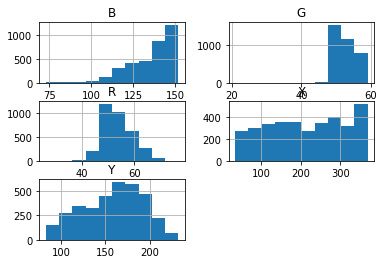

In [21]:
%matplotlib inline
import requests
#r = requests.get('https://github.com/zmadscientist/AnomalyDetectionSignals/blob/master/TorontoBlue.png')
# Read the 'TorontoBlue.png' and write the data to a csv file
blue = ReadPNG('TorontoBlue.png', 'blue_file_raw.csv', 0, 80, 0, 60, 70, 255)  # values are read and dumped to dataframe after filtering RGB channels
blue.hist()

## Display Blue Histogram

In [22]:
blueT = writeRGBcsv(blue,'blueT.csv')
blueT.head()

,meanY,stdY,meanYmean,meanYstd
X,,,,
35,129.500000,1.290994,154.707804,35.721516
36,122.000000,2.160247,154.707804,35.721516
37,121.000000,2.160247,154.707804,35.721516
38,122.333333,3.162278,154.707804,35.721516
39,120.500000,1.290994,154.707804,35.721516


## Plot Blue trimmed data

In [23]:
import matplotlib
print matplotlib.__version__

2.2.2


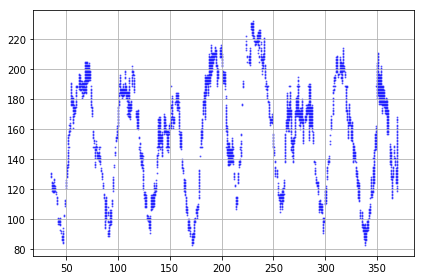

In [24]:
PlotTrimmed(blue, 'b', 1)

good page on aggregating user defined functions
https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/


# Read the TorontoRed.png file convert data to Pandas Dataframe

## Plot histogram of red data

,X,Y,R,G,B
8455,31,153,200,177,173
8458,31,150,200,169,164
8459,31,149,198,164,158
8460,31,148,198,164,158
8461,31,147,201,163,158


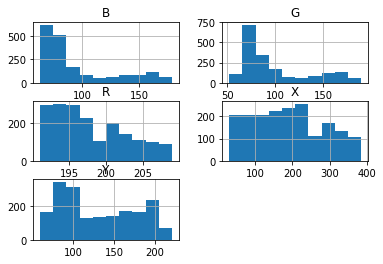

In [27]:
red = ReadPNG('TorontoRed.png', 'red_file_raw.csv', 190, 210, 0, 255, 0, 180)
red.hist()
red.head()

## write csv for red data

In [10]:
redT = writeRGBcsv(red,'redT.csv')
redT.head()

,meanY,stdY,meanYmean,meanYstd
X,,,,
31,142.611111,5.542763,123.76477,46.365381
32,132.000000,NaN,123.76477,46.365381
33,143.000000,NaN,123.76477,46.365381
34,121.250000,13.889444,123.76477,46.365381
35,108.000000,NaN,123.76477,46.365381


## Plot Red Transformer¶


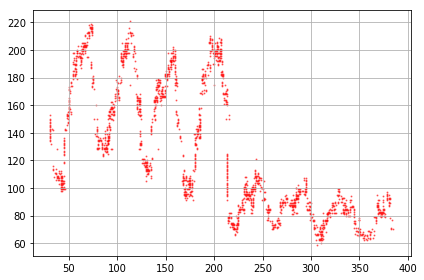

In [11]:
PlotTrimmed(red, 'r', 1)

# Find the Grid lines for  TorontoBlue.png

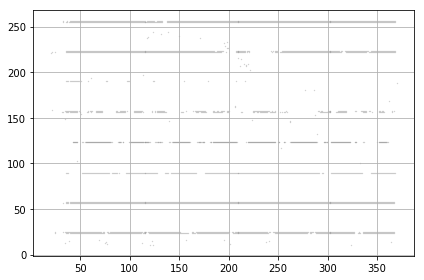

In [12]:
bluegray = ReadPNG('TorontoBlue.png', 'bluegray_file_raw.csv', 200, 224, 210, 220, 200, 220)
bluegray.hist()
PlotTrimmed(bluegray, 'gray', .1)

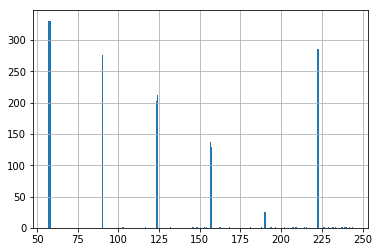

In [13]:
bluegray[(bluegray.X > 35) & (bluegray.Y > 35) & (bluegray.Y < 255)].Y.hist(bins=255)

In [14]:
bluegray[(bluegray.X > 35) & (bluegray.Y > 35) & (bluegray.Y < 255)].Y.head()

9915    223
9916    222
9948    190
9981    157
9982    156
Name: Y, dtype: int64

# Find the Grid lines for TorontoRed.png

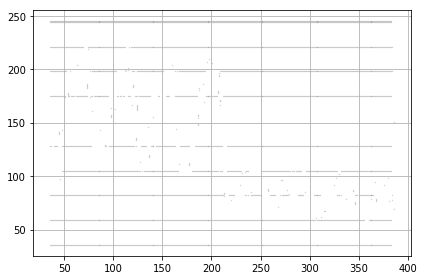

In [15]:
redgray = ReadPNG('TorontoRed.png', 'redgray_file_raw.csv', 20, 224, 160, 224, 180, 240)
redgray.hist()
PlotTrimmed(redgray[(redgray.X > 35) & (redgray.Y > 35) & (redgray.Y < 255)], 'gray', .1)

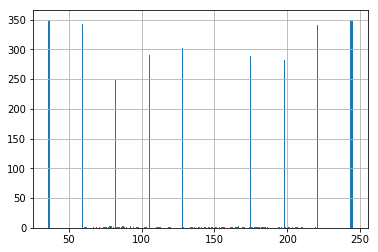

In [16]:
redgray[(redgray.X > 35) & (redgray.Y > 35) & (redgray.Y < 255)].Y.hist(bins=255)

# Experiment with converting data to image for CNN consumption

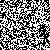

In [17]:

from PIL import Image
import random

data = [random.choice((0, 1)) for _ in range(2500)]
data[:] = [data[i:i + 50] for i in range(0, 2500, 50)]
#print data

img = Image.new('1', (50, 50))
pixels = img.load()

for i in range(img.size[0]):
    for j in range(img.size[1]):
        pixels[i, j] = data[i][j]

img.show()
img.save('/tmp/image.png')
from IPython.display import display
from PIL import Image

from IPython.display import Image
path="/tmp/image.png"
i = Image(filename=path)
i